# Lab 5: 2D (Bivariate) Data Visualization

**Dataset:** [Students Performance in Exams (Kaggle)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

This lab explores various 2D data visualization techniques using a real-world dataset. Each plot is accompanied by an explanation and insight.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from scipy.interpolate import make_interp_spline
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the dataset
df = pd.read_csv('data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Dataset Overview
- **Numerical:** math score, reading score, writing score
- **Categorical:** gender, race/ethnicity, parental level of education, lunch, test preparation course

This dataset contains exam scores and demographic information for 1000 students.

## 1. Scatter Plot Visualizations

We will explore relationships between students' exam scores and demographic features using scatter plots.

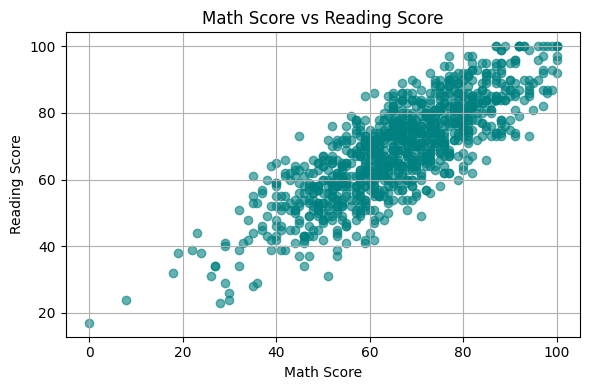

In [7]:
# Basic Scatter Plot: Math Score vs Reading Score

plt.figure(figsize=(6, 4))
plt.scatter(df['math score'], df['reading score'], alpha=0.6, color='teal')
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation:**  
This scatter plot shows the relationship between students' math and reading scores.  
**Insight:**  
There is a positive correlation:- students who score high in math also tend to score high in reading.

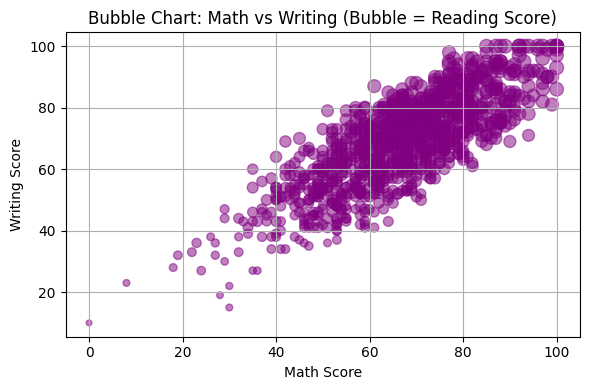

In [8]:
# Bubble Chart: Math Score vs Writing Score, Bubble Size = Reading Score

sizes = df['reading score']
plt.figure(figsize=(6, 4))
plt.scatter(df['math score'], df['writing score'], s=sizes, alpha=0.5, color='purple')
plt.title('Bubble Chart: Math vs Writing (Bubble = Reading Score)')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation:**  
This bubble chart visualizes math vs writing scores, with bubble size representing reading score.  
**Insight:**  
Larger bubbles (higher reading scores) are generally found where both math and writing scores are high, indicating overall strong academic performance.

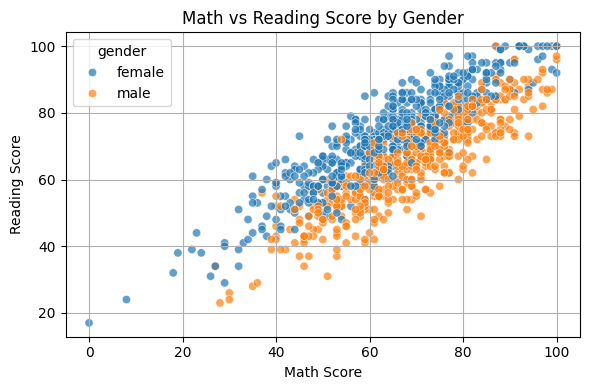

In [9]:
# Grouped Scatter Plot: Math vs Reading, colored by Gender

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', alpha=0.7)
plt.title('Math vs Reading Score by Gender')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation:**  
This scatter plot groups students by gender.  
**Insight:**  
Both genders show similar positive trends, but the distribution may reveal subtle differences in performance.

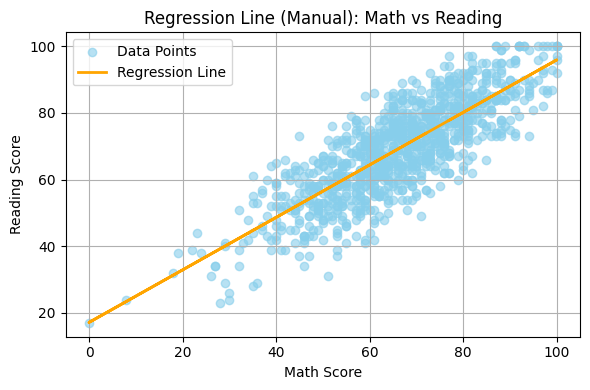

Equation: y = 0.79x + 17.14


In [10]:
# Regression Line (Manual Calculation): Math Score vs Reading Score

x = df['math score'].values
y = df['reading score'].values

x_bar = np.mean(x)
y_bar = np.mean(y)

# Least squares method
m = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2)
c = y_bar - m * x_bar

y_pred = m * x + c

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='skyblue', label='Data Points', alpha=0.6)
plt.plot(x, y_pred, color='orange', linewidth=2, label='Regression Line')
plt.title('Regression Line (Manual): Math vs Reading')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Equation: y = {m:.2f}x + {c:.2f}")

**Explanation:**  
This plot shows a regression line fitted manually using the least squares method.  
**Insight:**  
The positive slope confirms a strong linear relationship between math and reading scores.

<Figure size 800x800 with 0 Axes>

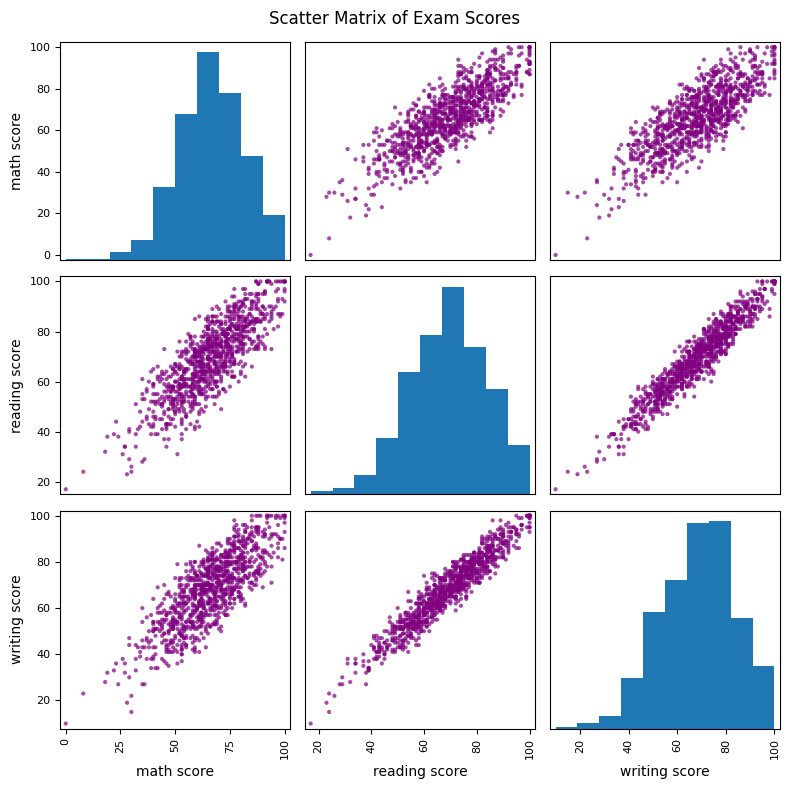

In [11]:
# Scatter Matrix for all scores

plt.figure(figsize=(8, 8))
scatter_matrix(df[['math score', 'reading score', 'writing score']], alpha=0.7, figsize=(8, 8), diagonal='hist', color='purple')
plt.suptitle('Scatter Matrix of Exam Scores')
plt.tight_layout()
plt.show()

**Explanation:**  
The scatter matrix shows pairwise relationships between all exam scores.  
**Insight:**  
All pairs show positive correlations, indicating students who do well in one subject tend to do well in others.

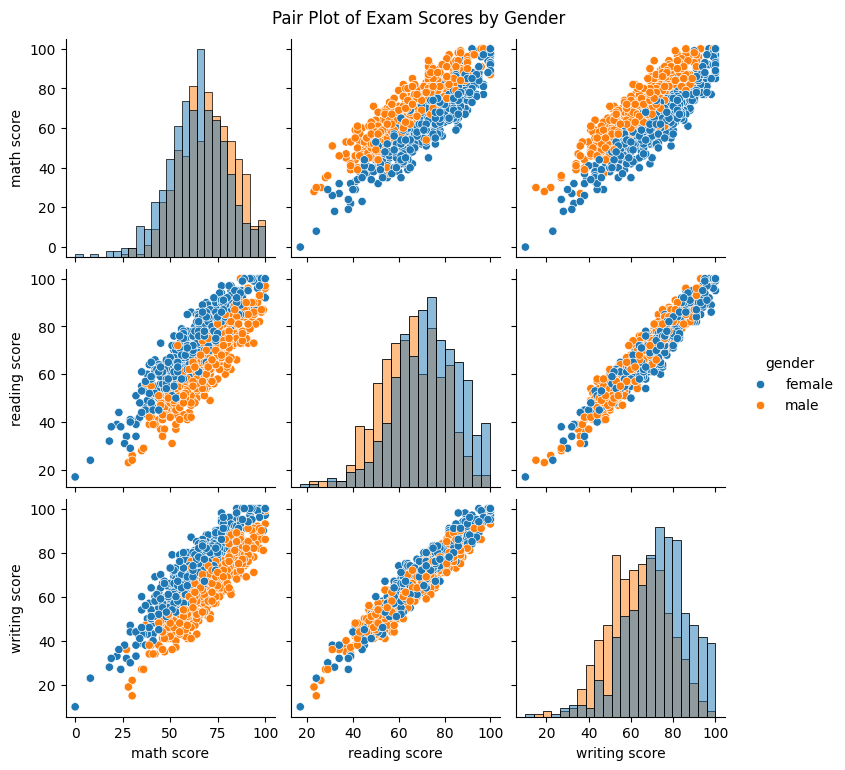

In [12]:
# Pair Plot with color grouping by gender

sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender', diag_kind='hist', height=2.5)
plt.suptitle('Pair Plot of Exam Scores by Gender', y=1.02)
plt.show()

**Explanation:**  
This pair plot uses color to distinguish gender.  
**Insight:**  
The distributions and relationships are similar for both genders, but subtle differences may be observed in the spread.

## 2. Line Chart Visualizations

We will visualize trends in exam scores using various line chart techniques. Since the dataset does not have a time column, we will use the student index as a proxy for time/order.

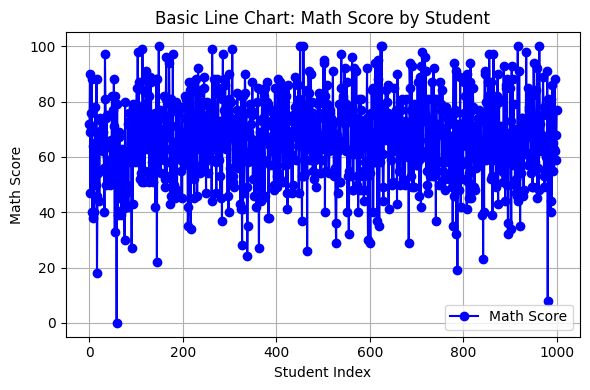

In [13]:
# Basic Line Chart: Math Score over Student Index

plt.figure(figsize=(6, 4))
plt.plot(df.index, df['math score'], marker='o', linestyle='-', color='blue', label='Math Score')
plt.title('Basic Line Chart: Math Score by Student')
plt.xlabel('Student Index')
plt.ylabel('Math Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Explanation:**  
This line chart shows math scores for each student (ordered by index).  
**Insight:**  
There is significant variation in scores, with no clear trend across the index.

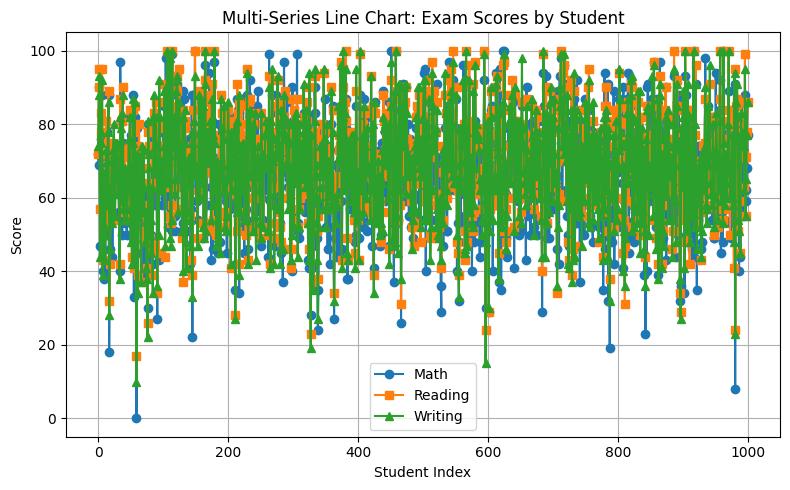

In [14]:
# Multi-Series Line Chart: All Scores

plt.figure(figsize=(8, 5))
plt.plot(df.index, df['math score'], label='Math', marker='o')
plt.plot(df.index, df['reading score'], label='Reading', marker='s')
plt.plot(df.index, df['writing score'], label='Writing', marker='^')
plt.title('Multi-Series Line Chart: Exam Scores by Student')
plt.xlabel('Student Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation:**  
This chart compares math, reading, and writing scores for each student.  
**Insight:**  
The three lines follow similar patterns, reinforcing the positive correlation between subjects.

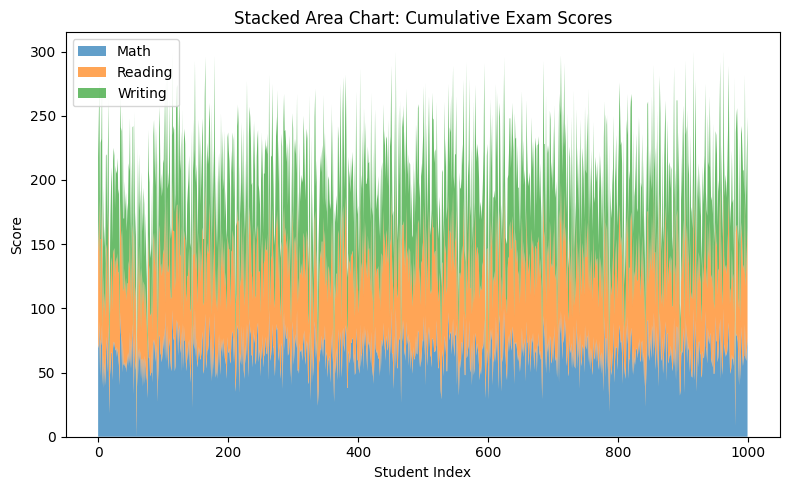

In [15]:
# Stacked Area Chart: Cumulative Scores

plt.figure(figsize=(8, 5))
plt.stackplot(df.index, df['math score'], df['reading score'], df['writing score'],
              labels=['Math', 'Reading', 'Writing'], alpha=0.7)
plt.title('Stacked Area Chart: Cumulative Exam Scores')
plt.xlabel('Student Index')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Explanation:**  
The stacked area chart shows the cumulative contribution of each subject to the total score per student.  
**Insight:**  
Reading and writing scores are generally close, with math scores sometimes lower.

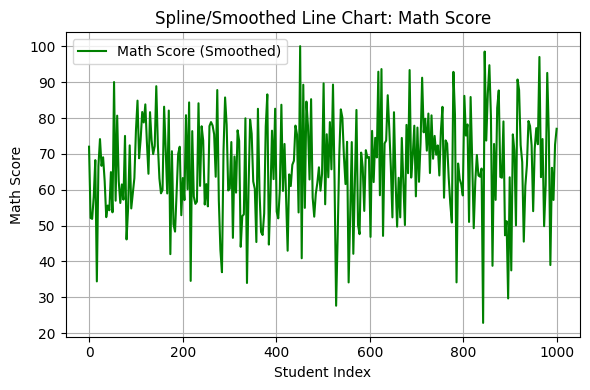

In [16]:
# Spline/Smoothed Line Chart: Smoothed Math Score

x = df.index
y = df['math score']
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x, y)(x_smooth)

plt.figure(figsize=(6, 4))
plt.plot(x_smooth, y_smooth, label='Math Score (Smoothed)', color='green')
plt.title('Spline/Smoothed Line Chart: Math Score')
plt.xlabel('Student Index')
plt.ylabel('Math Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Explanation:**  
This smoothed line chart uses spline interpolation to show the overall trend in math scores.  
**Insight:**  
The smoothed curve highlights general fluctuations and trends more clearly than the raw line chart.

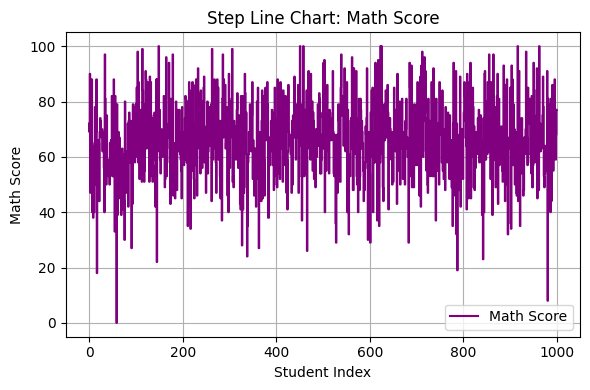

In [17]:
# Step Line Chart: Math Score

plt.figure(figsize=(6, 4))
plt.step(df.index, df['math score'], where='mid', label='Math Score', color='purple')
plt.title('Step Line Chart: Math Score')
plt.xlabel('Student Index')
plt.ylabel('Math Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Explanation:**  
The step line chart shows how math scores change from one student to the next.  
**Insight:**  
This format emphasizes discrete jumps in scores, which can be useful for identifying sudden changes.

## 3. Heatmap Visualizations

Heatmaps help visualize the structure and relationships in 2D data, such as exam scores and their correlations.

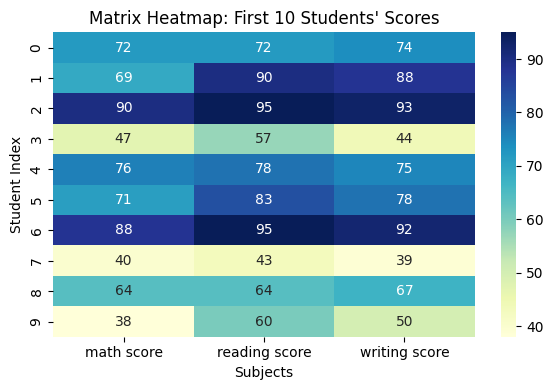

In [18]:
# Basic Matrix Heatmap: First 10 students' scores

data = df[['math score', 'reading score', 'writing score']].head(10)
plt.figure(figsize=(6, 4))
sns.heatmap(data, annot=True, cmap='YlGnBu')
plt.title('Matrix Heatmap: First 10 Students\' Scores')
plt.xlabel('Subjects')
plt.ylabel('Student Index')
plt.tight_layout()
plt.show()

**Explanation:**  
This heatmap shows the exam scores of the first 10 students.  
**Insight:**  
Darker colors indicate higher scores, making it easy to spot high and low performers.

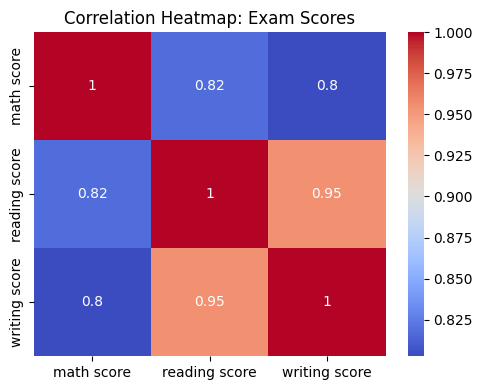

In [19]:
# Correlation Heatmap using Pandas

corr = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Exam Scores')
plt.tight_layout()
plt.show()

**Explanation:**  
This heatmap shows the correlation coefficients between exam scores.  
**Insight:**  
All subjects are highly positively correlated, especially reading and writing.

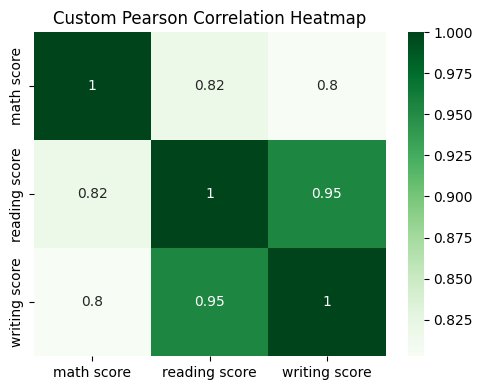

In [20]:
# Custom Correlation Heatmap (Manual Pearson Calculation)

def manual_corr(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    numerator = np.sum((x - x_bar) * (y - y_bar))
    denominator = np.sqrt(np.sum((x - x_bar) ** 2) * np.sum((y - y_bar) ** 2))
    return numerator / denominator

scores = df[['math score', 'reading score', 'writing score']]
manual_corr_matrix = scores.corr(method=lambda x, y: manual_corr(x, y))
plt.figure(figsize=(5, 4))
sns.heatmap(manual_corr_matrix, annot=True, cmap='Greens')
plt.title('Custom Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

**Explanation:**  
This heatmap uses a manual calculation of the Pearson correlation coefficient.  
**Insight:**  
Results match the built-in Pandas correlation, confirming the relationships.

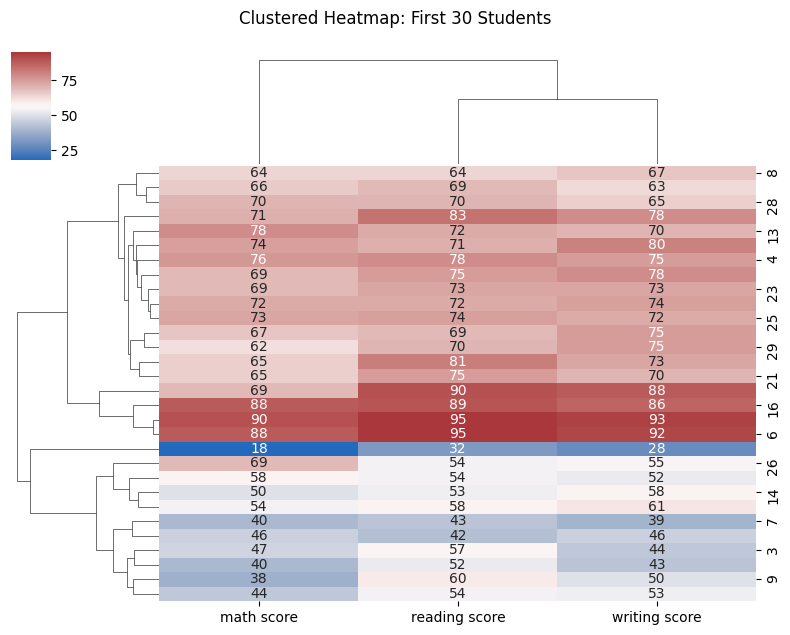

In [21]:
# Clustered Heatmap using seaborn.clustermap

sns.clustermap(df[['math score', 'reading score', 'writing score']].head(30), annot=True, cmap='vlag', figsize=(8, 6))
plt.suptitle('Clustered Heatmap: First 30 Students', y=1.05)
plt.show()

**Explanation:**  
The clustered heatmap groups students and subjects by similarity in scores.  
**Insight:**  
Clusters reveal groups of students with similar performance profiles.

In [23]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [xyzservices]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Geographic Heatmap (Non-spatial): Simulated region-wise average math scores

import folium
from folium.plugins import HeatMap
from IPython.display import display

# Simulate some region centers and average scores
locations = [
    [27.7, 85.3, 70],  # Kathmandu
    [28.2, 83.9, 65],  # Pokhara
    [26.7, 88.4, 60],  # Biratnagar
    [27.6, 84.4, 75],  # Bharatpur
    [28.0, 81.6, 55],  # Nepalgunj
]
heat_data = [[lat, lon, score] for lat, lon, score in locations]

# Create a map centered on Nepal
m = folium.Map(location=[28.0, 84.0], zoom_start=7)
HeatMap(heat_data, radius=25, max_zoom=13).add_to(m)

# Display the map inline in Colab
display(m)

**Explanation:**  
This is a simulated geographic heatmap showing average math scores in different regions of Nepal.  
**Insight:**  
Such maps can help identify regional disparities in educational performance.